<a href="https://colab.research.google.com/github/rajitakolla/computational_methods/blob/master/In_class_exercise_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The ninth in-class-exercise (20 points in total, 11/11/2020)**

The purpose of the exercise is to practice different machine learning algorithms for text classification as well as the performance evaluation. In addition, you are requried to conduct *10 fold cross validation (https://scikit-learn.org/stable/modules/cross_validation.html)* in the training. 

The dataset can be download from here: https://github.com/unt-iialab/INFO5731_FALL2020/blob/master/In_class_exercise/exercise09_datacollection.zip. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data. 

Algorithms:

(1) MultinominalNB

(2) SVM 

(3) KNN 

(4) Decision tree

(5) Random Forest

(6) XGBoost

Evaluation measurement:

(1) Accuracy

(2) Recall

(3) Precison 

(4) F-1 score

In [6]:
# Write your code here
import numpy as np
import pandas as pd
import sklearn as sk

In [7]:
from sklearn import datasets
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [8]:
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [15]:
#load the dataset

train_data = open("/content/stsa-train.txt","r")

In [16]:
#seperate the polarities and the sentences
def split_the_polarity(ip,ids):
  if(ids == 0):
    return ip[0:1]
  elif(ids == 1):
    return ip[2:len(ip)].replace("\n","")
  pass

In [17]:
list1 = train_data.readlines()

In [18]:

train_data_polarities = [int(split_the_polarity(i,0)) for i in list1]
train_data = [split_the_polarity(i,1) for i in list1]
trainDF = pd.DataFrame(train_data,columns=["sentences"])
trainDF["polarities"] = pd.DataFrame(train_data_polarities)

In [19]:
# pd.set_option('display.max_colwidth', None)
trainDF.head()

,sentences,polarities
0,"a stirring , funny and finally transporting re...",1
1,apparently reassembled from the cutting-room f...,0
2,they presume their audience wo n't sit still f...,0
3,this is a visually stunning rumination on love...,1
4,jonathan parker 's bartleby should have been t...,1


In [23]:
test_data = open("/content/stsa-test.txt","r")
list2 = test_data.readlines()
test_data_polarities = [int(split_the_polarity(i,0)) for i in list2]
test_data = [split_the_polarity(i,1) for i in list2]
testDF = pd.DataFrame(test_data,columns=["sentences"])
testDF["polarities"] = pd.DataFrame(test_data_polarities)

In [24]:
testDF.head(2)

,sentences,polarities
0,"no movement , no yuks , not much of anything .",0
1,"a gob of drivel so sickly sweet , even the eag...",0


shape of dataset 6920 rows and 2 columns


In [25]:
trainDF.shape

(6920, 2)

In [26]:
testDF.shape

(1821, 2)

**check how many are postive and how many are negative**

In [ ]:
trainDF["polarities"].value_counts()

1    3610
0    3310
Name: polarities, dtype: int64

**We have 3610 positve and 3310 negative reviews**

In [28]:
testDF["polarities"].value_counts()

0    912
1    909
Name: polarities, dtype: int64

**We have 909 positve and 912 negative reviews**

**Clean the Dataset**

In [29]:
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
wordnet= WordNetLemmatizer()
nltk.download('wordnet')
list_of_words = set(stopwords.words('english')) 
import re


def clean_dataset(value):
  #convert words to lower case
  value = value.lower()
  #remove punctuations
  tokens = value.split(" ")
  value = " ".join(x for x in tokens if x not in string.punctuation)
  #remove special characters and numbers other than space
  value = "".join(i for i in value if i.isalnum() or i == " ")
  #remove stop words
  tokens = re.split("\W+",value)
  value = [wordnet.lemmatize(x) for x in tokens if x not in list_of_words]
  return value

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [32]:
trainDF.head(5)

,sentences,polarities
0,"a stirring , funny and finally transporting re...",1
1,apparently reassembled from the cutting-room f...,0
2,they presume their audience wo n't sit still f...,0
3,this is a visually stunning rumination on love...,1
4,jonathan parker 's bartleby should have been t...,1


In [31]:
testDF.head(5)

,sentences,polarities
0,"no movement , no yuks , not much of anything .",0
1,"a gob of drivel so sickly sweet , even the eag...",0
2,"gangs of new york is an unapologetic mess , wh...",0
3,"we never really feel involved with the story ,...",0
4,this is one of polanski 's best films .,1


#**Transform the data**

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
#display the vocabulary
vectorizer = TfidfVectorizer(analyzer=clean_dataset)
tf_idf = vectorizer.fit_transform(trainDF["sentences"])

In [34]:
list_of_column_names = vectorizer.get_feature_names()

In [35]:
tf_idf_df = pd.DataFrame(tf_idf.toarray())
tf_idf_df.columns = list_of_column_names

In [36]:
tf_idf_df.shape

(6920, 13439)

In [97]:
vectorizer1 = TfidfVectorizer(analyzer=clean_dataset,vocabulary=vectorizer.vocabulary_)
vectorizer1.fit(testDF["sentences"])
tf_idf_test = vectorizer1.transform(testDF["sentences"])

In [98]:
op1 = testDF["sentences"]

**Convert the sentences**

In [ ]:
training_tf_idf_data = vectorizer.transform(trainDF["sentences"])

#**Split the data to 80% training and 20% testing data**

In [41]:
x_train, x_test, y_train, y_test = train_test_split(tf_idf_df, trainDF['polarities'].values,test_size=0.2)

#**Multinomial NB algorithm**

---



In [42]:
#create a object
from sklearn.naive_bayes import MultinomialNB
multinomialNB = MultinomialNB()

**Train the model**

In [43]:
multinomialNB_model = multinomialNB.fit(x_train,y_train)

**predict the ouput using multinomialNB**

In [44]:
y_op_multinomialNB = multinomialNB_model.predict(x_test)

In [45]:
y_op_multinomialNB

array([0, 0, 1, ..., 1, 1, 0])

**predict the test data**

In [99]:
y_op_test_multinomialNB = multinomialNB.predict(tf_idf_test)

In [100]:
y_op_test_multinomialNB

array([0, 0, 1, ..., 1, 0, 1])

In [101]:
from sklearn.metrics import accuracy_score,classification_report
import sys
import pprint

In [102]:

def fetch_the_accuracy(predicted,actual):
  print("\033[1m"+"Accuracy Score = ",round(accuracy_score(predicted,actual),2)*100,"%"+"\033[0m")
  print("\033[1m"+"The Classification report"+"\033[0m")
  print(classification_report(actual,predicted))
  # sys.modules[__name__].__dict__.clear()
  pass


In [103]:
import seaborn as sns
def visualizer(ip):
  sns.heatmap(pd.DataFrame(ip).iloc[:-1, :].T, annot=True)
  pass

In [104]:
def analyse_the_accuracy(n_splits):
  # evaluate the algorythm
  # fix the random seed
  # must use the same seed value so that the same subsets can be obtained
  # for each time the process is repeated
  seed = 7
  # split the whole dataset into folds 
  kfold = KFold(n_splits, random_state=seed,shuffle=True)
  # for logistic regression, we can use the accuracy level to evaluate the model / algorithm
  scoring = 'accuracy'
  return kfold
  pass

In [105]:
from sklearn.model_selection import cross_val_score
def cross_val_score_computation(modelObject, x_test,y_test):
  kfold = analyse_the_accuracy(10)
  print("\033[1m"+"Cross Validation Score",round(cross_val_score(modelObject,x_test,y_test,cv=kfold).mean()*100,2),"%","\033[0m")
  pass

In [106]:
import warnings
warnings.filterwarnings('ignore')

#**Metrics for MultinomialNB**

**Predicted Training data**

In [ ]:
fetch_the_accuracy(y_op_multinomialNB,y_test)

Accuracy Score =  76.0 %
The Classification report
              precision    recall  f1-score   support

           0       0.81      0.68      0.74       686
           1       0.73      0.84      0.78       698

    accuracy                           0.76      1384
   macro avg       0.77      0.76      0.76      1384
weighted avg       0.77      0.76      0.76      1384



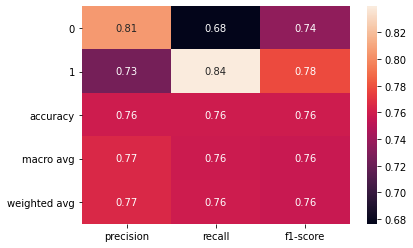

In [ ]:
#visualize the metrics 
visualizer(classification_report(y_test,y_op_multinomialNB,output_dict=True))

**Cross Validation Score for MultinomialNB**

In [ ]:
cross_val_score_computation(multinomialNB_model,x_test,y_test)

Cross Validation Score 71.03 % 


**Predicted testing data**

In [108]:
fetch_the_accuracy(y_op_test_multinomialNB,testDF["polarities"].values)

Accuracy Score =  79.0 %
The Classification report
              precision    recall  f1-score   support

           0       0.86      0.70      0.77       912
           1       0.74      0.89      0.81       909

    accuracy                           0.79      1821
   macro avg       0.80      0.79      0.79      1821
weighted avg       0.80      0.79      0.79      1821



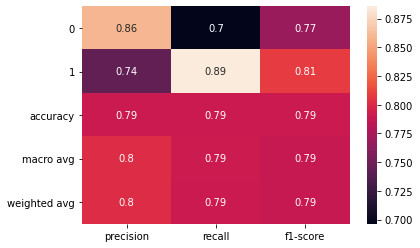

In [109]:
#visualize the metrics 
visualizer(classification_report(testDF["polarities"].values,y_op_test_multinomialNB,output_dict=True))

In [114]:
cross_val_score_computation(multinomialNB_model,tf_idf_test,y_op_test_multinomialNB)

Cross Validation Score 69.47 % 


#**SVM**

---



In [110]:
from sklearn.svm import LinearSVC
linearSVC = LinearSVC()

**Train the model**

In [111]:
linearSVC_model = linearSVC.fit(x_train,y_train)

**predict the values**

In [112]:
y_op_linearSVC = linearSVC_model.predict(x_test)

**predict the testing data**

In [115]:
y_op_test_linearSVC = linearSVC_model.predict(tf_idf_test)

In [116]:
y_op_test_linearSVC

array([0, 0, 1, ..., 1, 0, 1])

#**Metrics for SVC**

**Predicted Training data**

In [113]:
fetch_the_accuracy(y_op_linearSVC,y_test)

Accuracy Score =  79.0 %
The Classification report
              precision    recall  f1-score   support

           0       0.79      0.78      0.78       674
           1       0.79      0.80      0.80       710

    accuracy                           0.79      1384
   macro avg       0.79      0.79      0.79      1384
weighted avg       0.79      0.79      0.79      1384



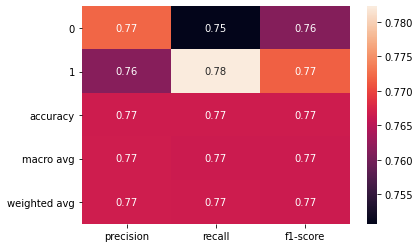

In [ ]:
#visualize the metrics 
visualizer(classification_report(y_test,y_op_linearSVC,output_dict=True))

**Cross Validation Score for Linearsvc**

In [ ]:
cross_val_score_computation(linearSVC_model,x_test,y_test)

Cross Validation Score 69.51 % 


**Predicted testing data**

In [117]:
fetch_the_accuracy(y_op_test_linearSVC,testDF["polarities"].values)

Accuracy Score =  78.0 %
The Classification report
              precision    recall  f1-score   support

           0       0.81      0.75      0.78       912
           1       0.76      0.82      0.79       909

    accuracy                           0.78      1821
   macro avg       0.79      0.78      0.78      1821
weighted avg       0.79      0.78      0.78      1821



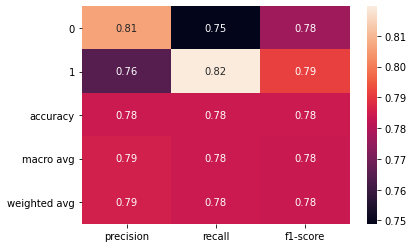

In [119]:
#visualize the metrics 
visualizer(classification_report(testDF["polarities"].values,y_op_test_linearSVC,output_dict=True))

**Cross validation score for LinearSVC**

In [120]:
cross_val_score_computation(linearSVC_model,tf_idf_test,y_op_test_linearSVC)

Cross Validation Score 78.14 % 


#**KNN Algorithm**

---



In [128]:
from sklearn.neighbors import KNeighborsClassifier
kneighborsClassifier = KNeighborsClassifier(n_neighbors=10,algorithm='brute')

**Train the model**

In [129]:
kneighborsClassifier_model = kneighborsClassifier.fit(x_train,y_train)

**Predict the model**

In [124]:
y_op_kneighborsClassifier = kneighborsClassifier_model.predict(x_test)

**Predict the test data**

In [130]:
y_op_test_kneighborsClassifier = kneighborsClassifier_model.predict(tf_idf_test)

In [131]:
y_op_test_kneighborsClassifier

array([0, 0, 1, ..., 0, 0, 0])

#**Metrics for KNN**

**Trained data**

In [ ]:
fetch_the_accuracy(y_op_kneighborsClassifier,y_test)

Accuracy Score =  56.99999999999999 %
The Classification report
              precision    recall  f1-score   support

           0       0.54      0.98      0.69       686
           1       0.88      0.18      0.30       698

    accuracy                           0.57      1384
   macro avg       0.71      0.58      0.50      1384
weighted avg       0.71      0.57      0.50      1384



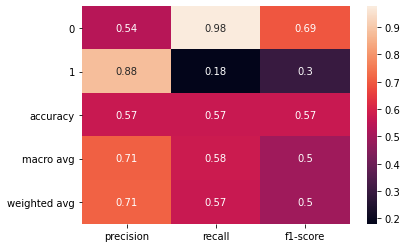

In [ ]:
#visualize the metrics 
visualizer(classification_report(y_test,y_op_kneighborsClassifier,output_dict=True))

**Cross Validation Score for KNN**

In [ ]:
cross_val_score_computation(kneighborsClassifier_model,x_test,y_test)

Cross Validation Score 67.48 % 


**test data metrics**

In [132]:
fetch_the_accuracy(y_op_test_kneighborsClassifier,testDF["polarities"].values)

Accuracy Score =  60.0 %
The Classification report
              precision    recall  f1-score   support

           0       0.56      0.97      0.71       912
           1       0.88      0.24      0.38       909

    accuracy                           0.60      1821
   macro avg       0.72      0.60      0.54      1821
weighted avg       0.72      0.60      0.54      1821



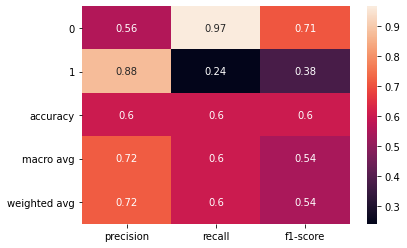

In [134]:
#visualize the metrics 
visualizer(classification_report(testDF["polarities"].values,y_op_test_kneighborsClassifier,output_dict=True))

In [135]:
cross_val_score_computation(kneighborsClassifier_model,tf_idf_test,y_op_test_kneighborsClassifier)

Cross Validation Score 86.38 % 


#**Decision Tree Algorithm**

In [137]:
from sklearn.tree import DecisionTreeClassifier
decisionTreeClassifier = DecisionTreeClassifier()

**Train the model**

In [138]:
decisionTreeClassifier_model = decisionTreeClassifier.fit(x_train,y_train)


**predict the output**

In [139]:
y_op_decisionTreeClassifier = decisionTreeClassifier_model.predict(x_test)

**predict the test data**

In [140]:
y_op_test_decisionTreeClassifier = decisionTreeClassifier_model.predict(tf_idf_test)

In [141]:
y_op_test_decisionTreeClassifier

array([0, 0, 0, ..., 0, 1, 1])

#**Metrics for Decision Tree**

**predctions for training data**

In [144]:
fetch_the_accuracy(y_op_decisionTreeClassifier,y_test)

Accuracy Score =  66.0 %
The Classification report
              precision    recall  f1-score   support

           0       0.65      0.67      0.66       674
           1       0.68      0.66      0.67       710

    accuracy                           0.66      1384
   macro avg       0.66      0.66      0.66      1384
weighted avg       0.66      0.66      0.66      1384



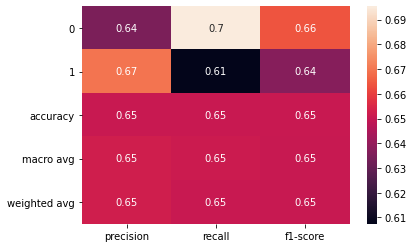

In [ ]:
#visualize the metrics 
visualizer(classification_report(y_test,y_op_decisionTreeClassifier,output_dict=True))

**Cross Validation Score for Decision Tree**

In [ ]:
cross_val_score_computation(decisionTreeClassifier_model,x_test,y_test)

Cross Validation Score 57.15 % 


**predctions for testing data**

In [143]:
fetch_the_accuracy(y_op_test_decisionTreeClassifier,testDF["polarities"].values)

Accuracy Score =  66.0 %
The Classification report
              precision    recall  f1-score   support

           0       0.66      0.66      0.66       912
           1       0.66      0.66      0.66       909

    accuracy                           0.66      1821
   macro avg       0.66      0.66      0.66      1821
weighted avg       0.66      0.66      0.66      1821



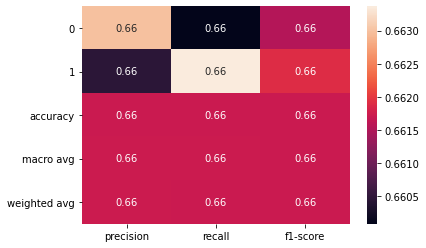

In [145]:
#visualize the metrics 
visualizer(classification_report(testDF["polarities"].values,y_op_test_decisionTreeClassifier,output_dict=True))

**Cross Validation Score for Decision Tree**

In [146]:
cross_val_score_computation(decisionTreeClassifier_model,tf_idf_test,y_op_test_decisionTreeClassifier)

Cross Validation Score 69.3 % 


#**Random Forest Algorithm**

In [148]:
from sklearn.ensemble import RandomForestClassifier
randomForestClassifier = RandomForestClassifier()

**Train the model**

In [149]:
randomForestClassifier_model = randomForestClassifier.fit(x_train,y_train)

**Predict the output**

In [ ]:
y_op_randomForestClassifier = randomForestClassifier_model.predict(x_test)

**prediction for test data**

In [150]:
y_op_test_randomForestClassifier = randomForestClassifier_model.predict(tf_idf_test)

#**Metrics for Random Forest Classifier**

**predicted training data**

In [ ]:
fetch_the_accuracy(y_op_randomForestClassifier,y_test)

Accuracy Score =  72.0 %
The Classification report
              precision    recall  f1-score   support

           0       0.71      0.75      0.73       686
           1       0.74      0.69      0.72       698

    accuracy                           0.72      1384
   macro avg       0.72      0.72      0.72      1384
weighted avg       0.72      0.72      0.72      1384



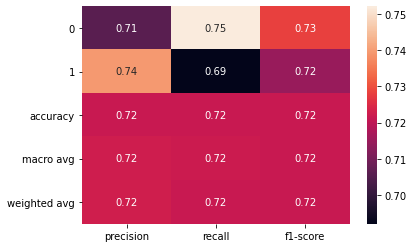

In [ ]:
#visualize the metrics 
visualizer(classification_report(y_test,y_op_randomForestClassifier,output_dict=True))

**Cross Validation Score for Random Forest**

In [ ]:
cross_val_score_computation(randomForestClassifier_model,x_test,y_test)

Cross Validation Score 64.02 % 


**predicted testing data**

In [151]:
fetch_the_accuracy(y_op_test_randomForestClassifier,testDF["polarities"].values)

Accuracy Score =  74.0 %
The Classification report
              precision    recall  f1-score   support

           0       0.73      0.76      0.74       912
           1       0.75      0.72      0.74       909

    accuracy                           0.74      1821
   macro avg       0.74      0.74      0.74      1821
weighted avg       0.74      0.74      0.74      1821



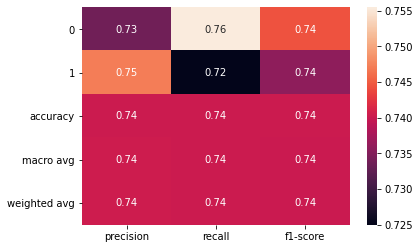

In [152]:
#visualize the metrics 
visualizer(classification_report(testDF["polarities"].values,y_op_test_randomForestClassifier,output_dict=True))

**Cross Validation Score for Random Forest**

In [153]:
cross_val_score_computation(randomForestClassifier_model,tf_idf_test,y_op_test_randomForestClassifier)

Cross Validation Score 78.36 % 


#**XGBoost Algorithm**

In [163]:
from xgboost import XGBClassifier
xgbClassifier = XGBClassifier()

**Train the model**

In [162]:
xgbClassifier_model = xgbClassifier.fit(x_train,y_train)

**predict the output**

In [ ]:
y_op_xgbClassifier= xgbClassifier_model.predict(x_test)

**predict the ouput of test data**

In [171]:
op1 = pd.DataFrame(tf_idf_test.toarray())
op1.columns = vectorizer1.get_feature_names()

In [173]:
y_op_test_xgbClassifier= xgbClassifier_model.predict(op1)

#**Metrics for XGBoost Algorithm**

**predict for trained data**

In [ ]:
fetch_the_accuracy(y_op_xgbClassifier,y_test)

Accuracy Score =  65.0 %
The Classification report
              precision    recall  f1-score   support

           0       0.74      0.43      0.55       686
           1       0.61      0.85      0.71       698

    accuracy                           0.65      1384
   macro avg       0.68      0.64      0.63      1384
weighted avg       0.67      0.65      0.63      1384



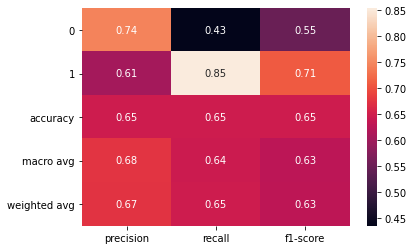

In [ ]:
#visualize the metrics 
visualizer(classification_report(y_test,y_op_xgbClassifier,output_dict=True))

**Cross Validation Score for XGBoost**

In [ ]:
cross_val_score_computation(xgbClassifier_model,x_test,y_test)

Cross Validation Score 58.75 % 


**predict for testing data**

In [174]:
fetch_the_accuracy(y_op_test_xgbClassifier,testDF["polarities"].values)

Accuracy Score =  66.0 %
The Classification report
              precision    recall  f1-score   support

           0       0.78      0.44      0.56       912
           1       0.61      0.87      0.72       909

    accuracy                           0.66      1821
   macro avg       0.69      0.66      0.64      1821
weighted avg       0.69      0.66      0.64      1821



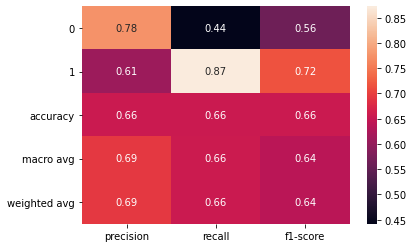

In [175]:
#visualize the metrics 
visualizer(classification_report(testDF["polarities"].values,y_op_test_xgbClassifier,output_dict=True))

**Cross Validation Score for XGBoost**

In [176]:
cross_val_score_computation(xgbClassifier_model,tf_idf_test,y_op_test_xgbClassifier)

Cross Validation Score 86.0 % 


#**The accuracy for various models**



1.   **MultinomialNB : 76.0%**
2.   **SVM : 77.0%**
3.   **KNN : 56.9%**
4.   **Decision Tree : 65.0%**
5.   **Random Forest : 72.0%**
6.   **XGBoost : 65.0%**
